Rafael Gayahan
RMG180000
CS4375.003
Professor Chen

# Convolutionial Neural Network on MNIST dataset

### Data Exploration and checking sizes and sample images of MNIST

### Displaying what MNIST looks like

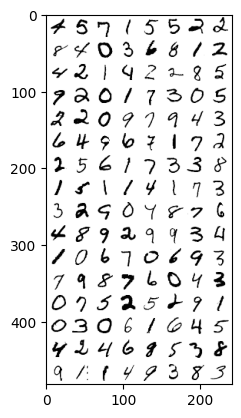

In [31]:
from torch.utils.tensorboard import SummaryWriter
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(mnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(X_train, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(mnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

writer = SummaryWriter('runs/MNIST Experiment Using Given CNN')
dataiter = iter(train_loader)
images, labels = next(dataiter)

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

#creating a grid of images
img_grid = torchvision.utils.make_grid(images)
#show images
matplotlib_imshow(img_grid, one_channel = True)
writer.add_image('MNIST images', img_grid)

### Singular Image and Shape

MNIST train set shape
torch.Size([60000]) 

MNIST test set shape
torch.Size([10000]) 

Shape of one picture
torch.Size([28, 28]) 

Image [0][0][0] in the testing set




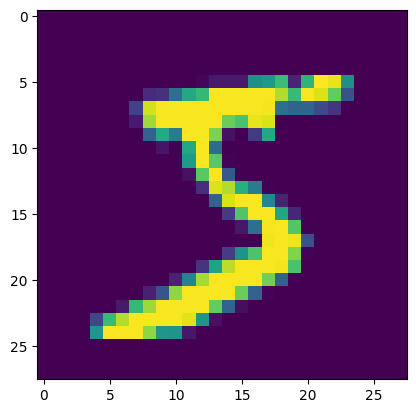

In [32]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(mnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(X_train, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(mnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

print("MNIST train set shape")
print(mnist_trainset.targets.shape, "\n")

print("MNIST test set shape")
print(mnist_testset.targets.shape, "\n")

print("Shape of one picture")
print(mnist_trainset[0][0][0].shape, "\n")

print("Image [0][0][0] in the testing set")
plt.imshow(mnist_trainset[0][0][0])
print("\n")


### Grayscale Image

Image [0][0][0] turned to grayscale for 1 channel input


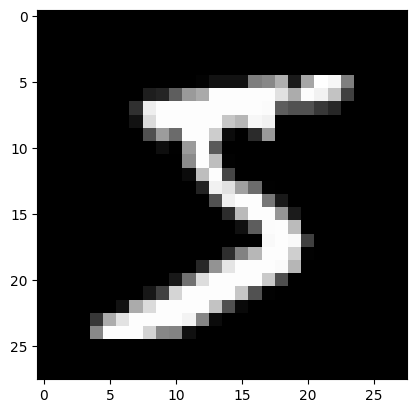

In [33]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(mnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(X_train, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(mnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

print("Image [0][0][0] turned to grayscale for 1 channel input")
plt.imshow(mnist_trainset[0][0][0], cmap = 'gray')

### Convolutional Neural Network Using Given Example

In [34]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(mnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(X_train, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(mnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

#net class given in the homework page
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size = 5, stride = 1, padding = 2),
            nn.BatchNorm2d(4, eps = 1e-05, momentum = 0.1, affine = True, track_running_stats = True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0, dilation = 1, ceil_mode = False),
            nn.Conv2d(4, 4, kernel_size=(3, 3), stride = (1, 1), padding = (1, 1)),
            nn.BatchNorm2d(4, eps=1e-05, momentum = 0.1, affine = True, track_running_stats = True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0, dilation = 1, ceil_mode= False),
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=196, out_features = 10, bias = True)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total

model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    model.eval()
    prediction = torch.tensor([])
    with torch.no_grad():
        for batch in dataLoader:
            images, labels = batch
            pred = model(images)
            prediction = torch.cat((prediction , pred))
    return prediction


Epoch 1
Training loss: 0.498
Validation loss: 0.185
Testing loss: 0.179
Accuracy:  95.12999725341797 

Epoch 2
Training loss: 0.151
Validation loss: 0.123
Testing loss: 0.116
Accuracy:  96.31999969482422 

Epoch 3
Training loss: 0.111
Validation loss: 0.102
Testing loss: 0.097
Accuracy:  96.83999633789062 

Epoch 4
Training loss: 0.092
Validation loss: 0.091
Testing loss: 0.084
Accuracy:  97.30000305175781 

Epoch 5
Training loss: 0.080
Validation loss: 0.082
Testing loss: 0.075
Accuracy:  97.52999877929688 

Epoch 6
Training loss: 0.073
Validation loss: 0.075
Testing loss: 0.069
Accuracy:  97.62999725341797 

Epoch 7
Training loss: 0.067
Validation loss: 0.071
Testing loss: 0.064
Accuracy:  97.80000305175781 

Epoch 8
Training loss: 0.063
Validation loss: 0.070
Testing loss: 0.069
Accuracy:  97.83000183105469 

Epoch 9
Training loss: 0.060
Validation loss: 0.071
Testing loss: 0.065
Accuracy:  97.86000061035156 

Epoch 10
Training loss: 0.058
Validation loss: 0.066
Testing loss: 0.057


## Displaying Training, Validation, and Testing Loss Curves and Accuracy Over Time Using Given CNN

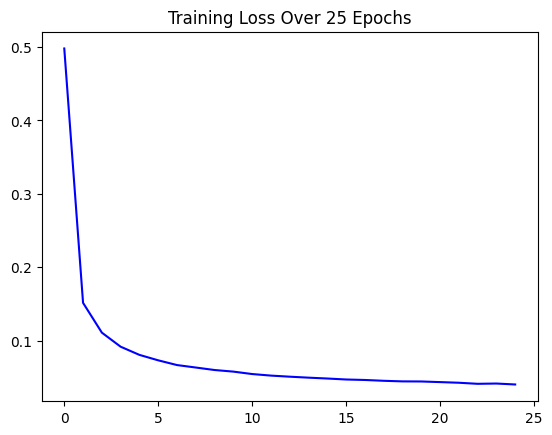

In [35]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

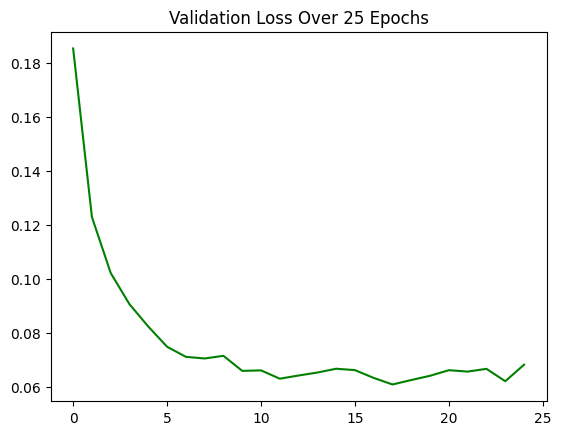

In [36]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

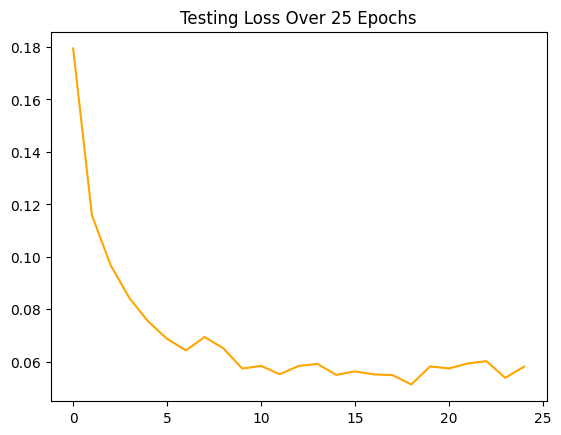

In [37]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

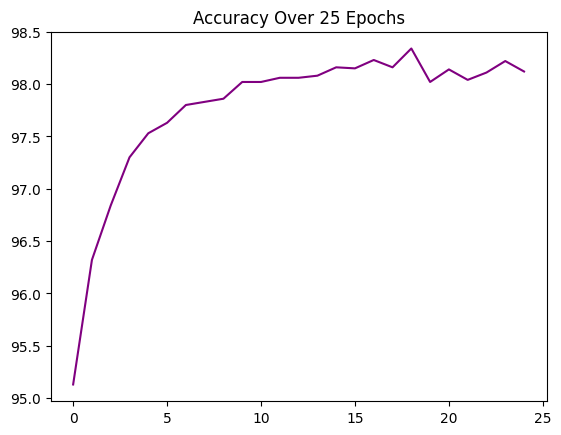

In [38]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

# MNIST LeNet Implementation

In [39]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


#getting sets and converting to tensor so that can send it to a torch data loader
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(mnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(X_train, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 2)
test_loader = DataLoader(mnist_testset, batch_size = 64, shuffle = True, num_workers = 2)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 1,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        nn.Flatten(),
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model

def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
        
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    

Epoch 1
Training loss: 0.312
Validation loss: 0.190
Testing loss: 0.115
Accuracy:  96.37000274658203 

Epoch 2
Training loss: 0.409
Validation loss: 0.129
Testing loss: 0.077
Accuracy:  97.5999984741211 

Epoch 3
Training loss: 0.473
Validation loss: 0.098
Testing loss: 0.058
Accuracy:  98.12000274658203 

Epoch 4
Training loss: 0.522
Validation loss: 0.087
Testing loss: 0.052
Accuracy:  98.31999969482422 

Epoch 5
Training loss: 0.561
Validation loss: 0.074
Testing loss: 0.044
Accuracy:  98.48999786376953 

Epoch 6
Training loss: 0.594
Validation loss: 0.070
Testing loss: 0.042
Accuracy:  98.58999633789062 

Epoch 7
Training loss: 0.620
Validation loss: 0.075
Testing loss: 0.045
Accuracy:  98.5 

Epoch 8
Training loss: 0.643
Validation loss: 0.068
Testing loss: 0.041
Accuracy:  98.73999786376953 

Epoch 9
Training loss: 0.662
Validation loss: 0.067
Testing loss: 0.040
Accuracy:  98.7699966430664 

Epoch 10
Training loss: 0.679
Validation loss: 0.067
Testing loss: 0.040
Accuracy:  98.8

## Training Loss, Validation Loss, Testing Loss,  Accuracy Using LeNet

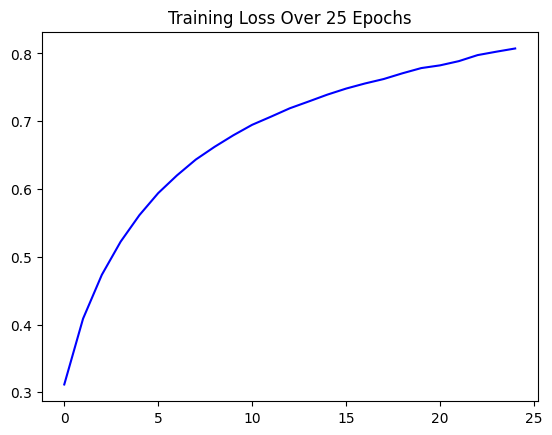

In [40]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

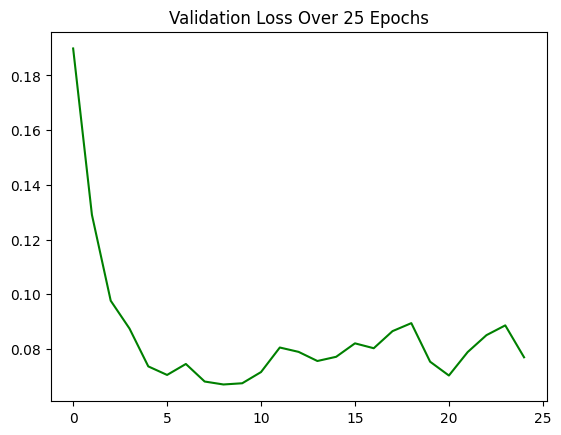

In [41]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

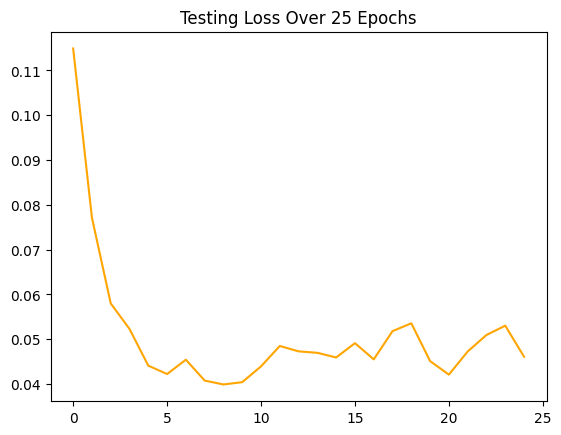

In [42]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

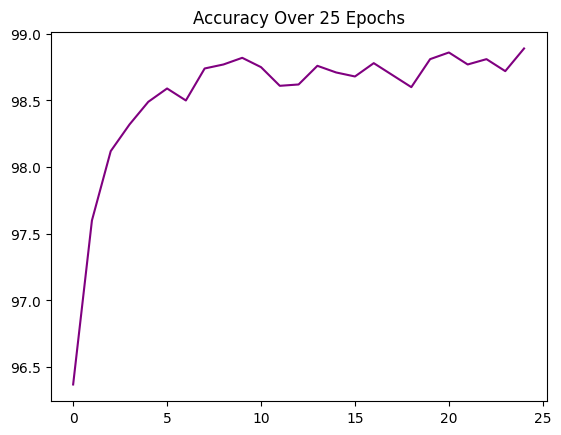

In [43]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

# Fashion MNIST CNN

### Fashion MNIST data exploration

### What Fashion MNIST Looks like

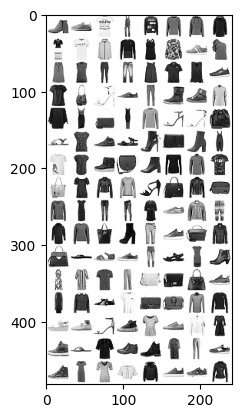

In [44]:
from torch.utils.tensorboard import SummaryWriter
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

#getting sets and converting to tensor so that can send it to a torch data loader
Fmnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
Fmnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(Fmnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(Fmnist_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(Fmnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

writer = SummaryWriter('runs/MNIST Experiment Using Given CNN')
dataiter = iter(train_loader)
images, labels = next(dataiter)

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

#creating a grid of images
img_grid = torchvision.utils.make_grid(images)
#show images
matplotlib_imshow(img_grid, one_channel = True)
writer.add_image('MNIST images', img_grid)

MNIST train set shape
torch.Size([60000]) 

MNIST test set shape
torch.Size([10000]) 

Shape of one picture
torch.Size([28, 28]) 

Image [0][0][0] in the testing set




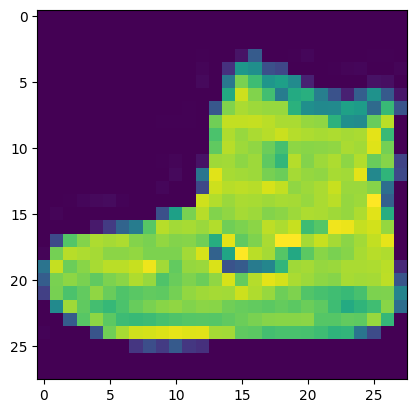

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

#getting sets and converting to tensor so that can send it to a torch data loader
Fmnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
Fmnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(Fmnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(Fmnist_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(Fmnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

print("MNIST train set shape")
print(Fmnist_trainset.targets.shape, "\n")

print("MNIST test set shape")
print(Fmnist_testset.targets.shape, "\n")

print("Shape of one picture")
print(Fmnist_trainset[0][0][0].shape, "\n")

print("Image [0][0][0] in the testing set")
plt.imshow(Fmnist_trainset[0][0][0])
print("\n")


Image [0][0][0] turned to grayscale for 1 channel input


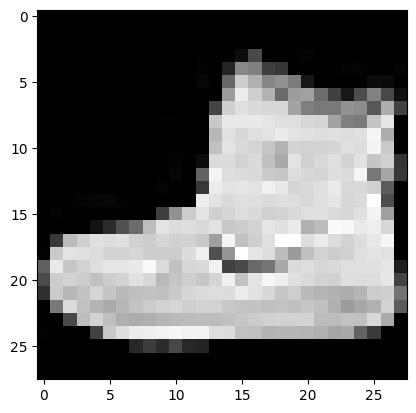

In [46]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

#getting sets and converting to tensor so that can send it to a torch data loader
Fmnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
Fmnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(Fmnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(Fmnist_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(Fmnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

print("Image [0][0][0] turned to grayscale for 1 channel input")
plt.imshow(Fmnist_trainset[0][0][0], cmap = 'gray')

### Fashion MNIST using simple example

In [47]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

#getting sets and converting to tensor so that can send it to a torch data loader
Fmnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
Fmnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(Fmnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(Fmnist_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(Fmnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

#training labels
print(Fmnist_trainset.targets)
#testing set labels
print(Fmnist_testset.targets)

#sample image


#net class given in the homework page
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size = (3, 3), stride = (1, 1), padding = (1, 1)),
            nn.BatchNorm2d(4, eps = 1e-05, momentum = 0.1, affine = True, track_running_stats = True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0, dilation = 1, ceil_mode = False),
            nn.Conv2d(4, 4, kernel_size=(3, 3), stride = (1, 1), padding = (1, 1)),
            nn.BatchNorm2d(4, eps=1e-05, momentum = 0.1, affine = True, track_running_stats = True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0, dilation = 1, ceil_mode= False),
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=196, out_features = 10, bias = True)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-05)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

print('Accuracy:', accuracy_score(Fmnist_trainset.targets, train_predict.argmax(dim=1)))
print('F1:', f1_score(Fmnist_trainset.targets, train_predict.argmax(dim=1), average='weighted'))


tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 2, 1,  ..., 8, 1, 5])
Epoch 1
Training loss: 2.291
Validation loss: 2.142
Testing loss: 2.143
Accuracy:  25.56999969482422 

Epoch 2
Training loss: 2.029
Validation loss: 1.918
Testing loss: 1.918
Accuracy:  42.31999969482422 

Epoch 3
Training loss: 1.826
Validation loss: 1.729
Testing loss: 1.728
Accuracy:  51.709999084472656 

Epoch 4
Training loss: 1.639
Validation loss: 1.541
Testing loss: 1.544
Accuracy:  57.0099983215332 

Epoch 5
Training loss: 1.468
Validation loss: 1.391
Testing loss: 1.395
Accuracy:  61.29999923706055 

Epoch 6
Training loss: 1.321
Validation loss: 1.243
Testing loss: 1.248
Accuracy:  64.54000091552734 

Epoch 7
Training loss: 1.199
Validation loss: 1.141
Testing loss: 1.147
Accuracy:  67.33000183105469 

Epoch 8
Training loss: 1.101
Validation loss: 1.055
Testing loss: 1.060
Accuracy:  69.23999786376953 

Epoch 9
Training loss: 1.022
Validation loss: 0.985
Testing loss: 0.988
Accuracy:  70.51000213623047 

Epoch 1

### Training, Validation, Testing set loss & Accuracy over 25 Epochs

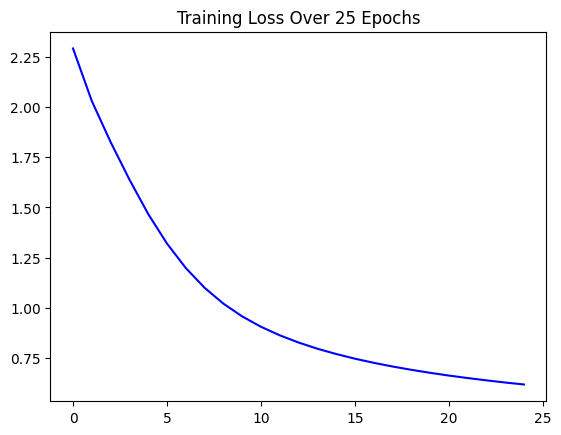

In [48]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

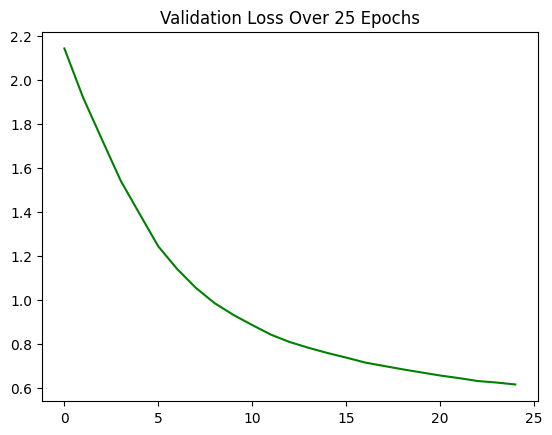

In [49]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

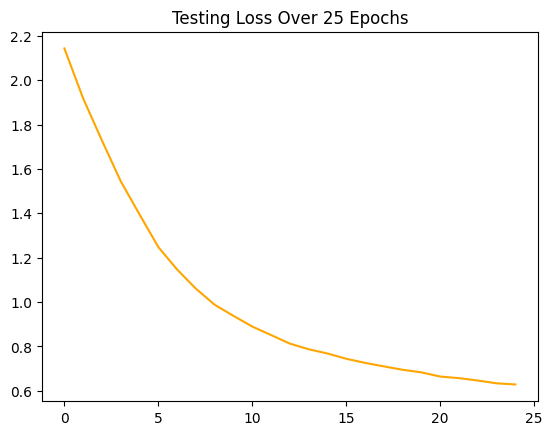

In [50]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

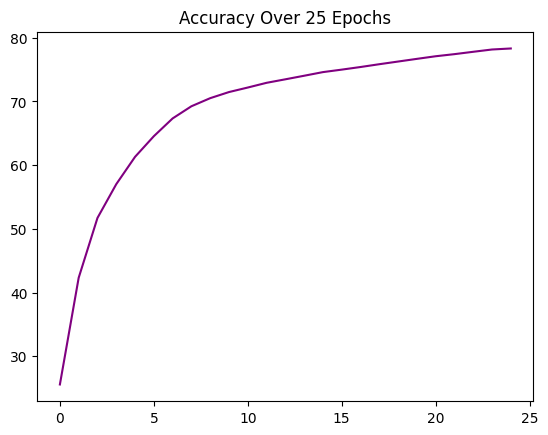

In [51]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### Fashion MNIST using LeNet Architecture

In [52]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

#getting sets and converting to tensor so that can send it to a torch data loader
Fmnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
Fmnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(Fmnist_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(Fmnist_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(Fmnist_testset, batch_size = 128, shuffle = True, num_workers = 2)

#training labels
print(Fmnist_trainset.targets)
#testing set labels
print(Fmnist_testset.targets)

#sample image


#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 1,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        nn.Flatten(),
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-05)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

print('Accuracy:', accuracy_score(Fmnist_trainset.targets, train_predict.argmax(dim=1)))
print('F1:', f1_score(Fmnist_trainset.targets, train_predict.argmax(dim=1), average='weighted'))


tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([9, 2, 1,  ..., 8, 1, 5])
Epoch 1
Training loss: 2.239
Validation loss: 2.138
Testing loss: 2.138
Accuracy:  43.150001525878906 

Epoch 2
Training loss: 1.922
Validation loss: 1.693
Testing loss: 1.690
Accuracy:  47.709999084472656 

Epoch 3
Training loss: 1.531
Validation loss: 1.417
Testing loss: 1.412
Accuracy:  52.2599983215332 

Epoch 4
Training loss: 1.332
Validation loss: 1.275
Testing loss: 1.272
Accuracy:  55.41999816894531 

Epoch 5
Training loss: 1.219
Validation loss: 1.183
Testing loss: 1.182
Accuracy:  58.04999923706055 

Epoch 6
Training loss: 1.139
Validation loss: 1.113
Testing loss: 1.113
Accuracy:  61.20000076293945 

Epoch 7
Training loss: 1.075
Validation loss: 1.054
Testing loss: 1.056
Accuracy:  63.4900016784668 

Epoch 8
Training loss: 1.020
Validation loss: 1.002
Testing loss: 1.008
Accuracy:  65.81999969482422 

Epoch 9
Training loss: 0.971
Validation loss: 0.954
Testing loss: 0.959
Accuracy:  67.55000305175781 

Epoch 1

### Training, Validation, Testing set loss & Accuracy over 25 Epochs Using LeNet

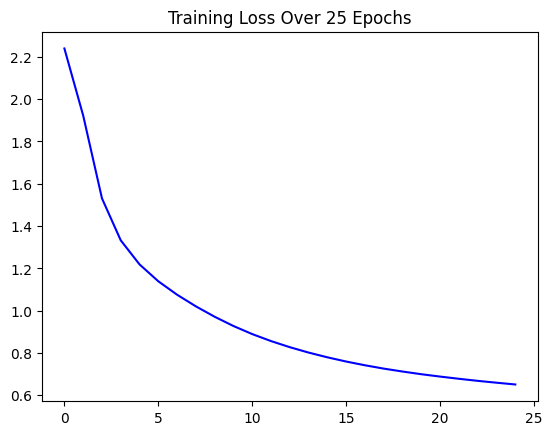

In [53]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

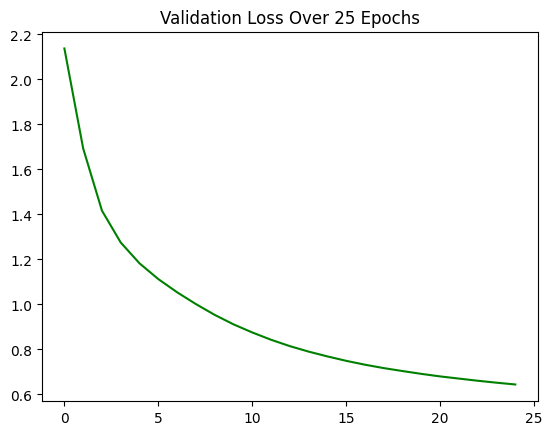

In [54]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

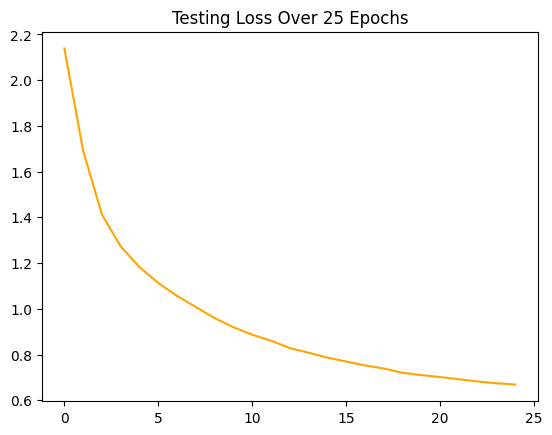

In [55]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

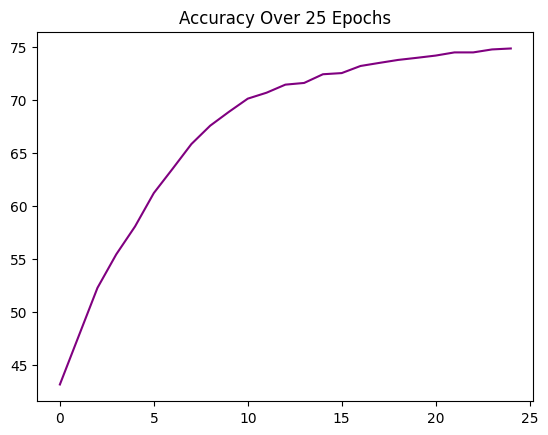

In [56]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

# CIFAR10 with CNN Implementation & LeNet

### CIFAR10 Displayed

Files already downloaded and verified
Files already downloaded and verified


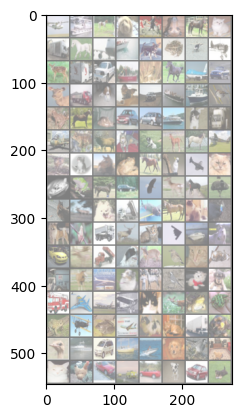

In [57]:
from torch.utils.tensorboard import SummaryWriter
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 128, shuffle = True, num_workers = 2)

writer = SummaryWriter('runs/MNIST Experiment Using Given CNN')
dataiter = iter(train_loader)
images, labels = next(dataiter)

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

#creating a grid of images
img_grid = torchvision.utils.make_grid(images)
#show images
matplotlib_imshow(img_grid)
writer.add_image('MNIST images', img_grid)

### Showing what CIFAR10 Looks Like Grayscaled

Files already downloaded and verified
Files already downloaded and verified


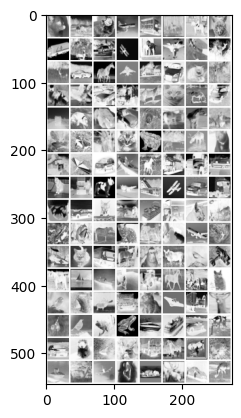

In [58]:
from torch.utils.tensorboard import SummaryWriter
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1), transforms.ToTensor()])

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 128, shuffle = True, num_workers = 2)

writer = SummaryWriter('runs/MNIST Experiment Using Given CNN')
dataiter = iter(train_loader)
images, labels = next(dataiter)

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

#creating a grid of images
img_grid = torchvision.utils.make_grid(images)
#show images
matplotlib_imshow(img_grid, one_channel = True)
writer.add_image('MNIST images', img_grid)

### Checking train_test_split on the CIFAR10 model

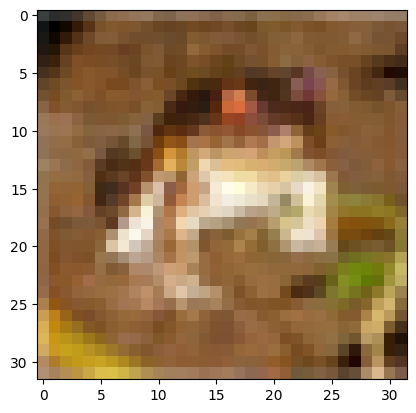

(48000, 32, 32, 3)
(48000, 1)


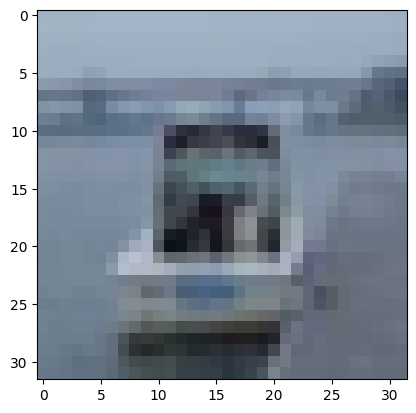

In [59]:

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
#need to load the data using keras' own way of splitting with X_train Y_train and then will
#split it myself using sklearn's train_test_split
#looking at the first image on the dataset to make sure it works
plt.imshow(X_train[0])
plt.show()

#concatenate together the training sets with the testing sets so that we can get full size
#sets and then split it myself using train_test_split
X = np.concatenate((X_train, X_test))
Y = np.concatenate((Y_train, Y_test))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 20)

#checking the shape of the models
print(X_train.shape)
print(Y_train.shape)

#checking random image to see if success on split and if it was randomized
plt.imshow(X_train[0])
plt.show()

### CIFAR10 Data shapes and example outputs

Files already downloaded and verified
Files already downloaded and verified
CIFAR10 train set shape
(50000, 32, 32, 3) 

CIFAR10 test set shape
(10000, 32, 32, 3) 

Shape of one picture
torch.Size([32, 32]) 

Image [0][0][0] in the testing set


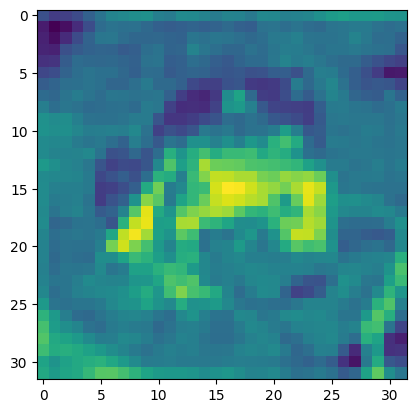

In [60]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1), transforms.ToTensor()])

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 128, shuffle = True, num_workers = 2)

print("CIFAR10 train set shape")
print(CIFAR10_trainset.data.shape, "\n")

print("CIFAR10 test set shape")
print(CIFAR10_testset.data.shape, "\n")

print("Shape of one picture")
print(CIFAR10_trainset[0][0][0].shape, "\n")

print("Image [0][0][0] in the testing set")
plt.imshow(CIFAR10_trainset[0][0][0])
plt.show()
print("\n")


### CIFAR10 Grayscaled frog

Files already downloaded and verified
Files already downloaded and verified
Image [0][0][0] in the testing set


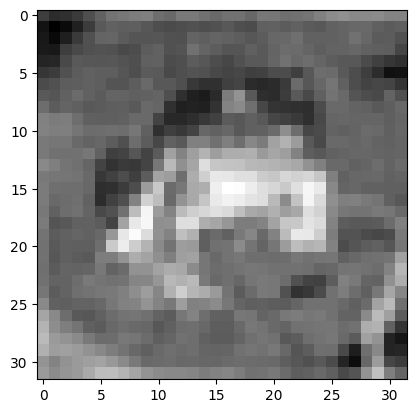

In [61]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1), transforms.ToTensor()])

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 128, shuffle = True, num_workers = 2)

print("Image [0][0][0] in the testing set")
plt.imshow(CIFAR10_trainset[0][0][0], cmap = 'gray')
plt.show()


### CIFAR10 Using Simple CNN Example

In [62]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1), transforms.ToTensor()])

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 128, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#net class given in the homework page
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size = (3, 3), stride = (1, 1), padding = (1, 1)),
            nn.BatchNorm2d(4, eps = 1e-05, momentum = 0.1, affine = True, track_running_stats = True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0, dilation = 1, ceil_mode = False),
            nn.Conv2d(4, 4, kernel_size=(3, 3), stride = (1, 1), padding = (1, 1)),
            nn.BatchNorm2d(4, eps=1e-05, momentum = 0.1, affine = True, track_running_stats = True),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride = 2, padding = 0, dilation = 1, ceil_mode= False),
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=256, out_features = 128, bias = True)
        )

    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-05)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 4.598
Validation loss: 4.029
Testing loss: 4.029
Accuracy:  9.460000038146973 

Epoch 2
Training loss: 3.571
Validation loss: 3.191
Testing loss: 3.192
Accuracy:  10.180000305175781 

Epoch 3
Training loss: 2.939
Validation loss: 2.738
Testing loss: 2.741
Accuracy:  11.369999885559082 

Epoch 4
Training loss: 2.618
Validation loss: 2.523
Testing loss: 2.522
Accuracy:  13.020000457763672 

Epoch 5
Training loss: 2.453
Validation loss: 2.399
Testing loss: 2.399
Accuracy:  15.109999656677246 

Epoch 6
Training loss: 2.355
Validation loss: 2.323
Testing loss: 2.319
Accuracy:  16.59000015258789 

Epoch 7
Training loss: 2.288
Validation loss: 2.261
Testing loss: 2.262
Accuracy:  18.709999084472656 

Epoch 8
Training loss: 2.237
Validation loss: 2.220
Testing loss: 2.216
Accuracy:  20.610000610351562 

Epoch 9
Training loss: 2.195
Validation loss: 2.185
Testing loss: 2.174
Accuracy:  22.44000053

### Training, Validation, Testing set loss & Accuracy over 25 Epochs

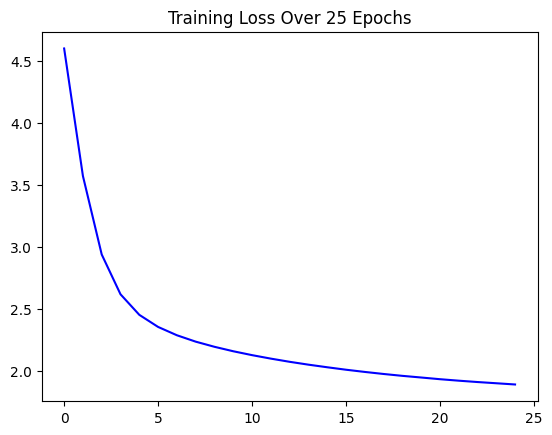

In [63]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

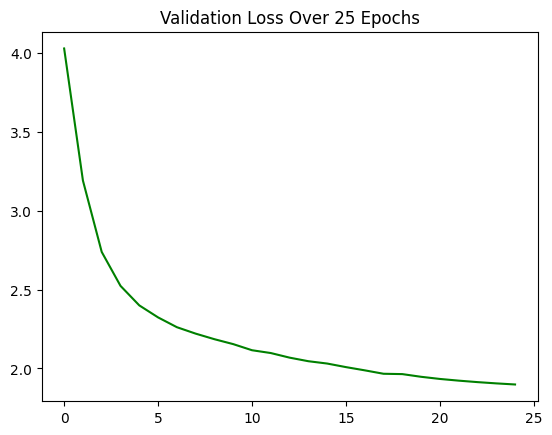

In [64]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

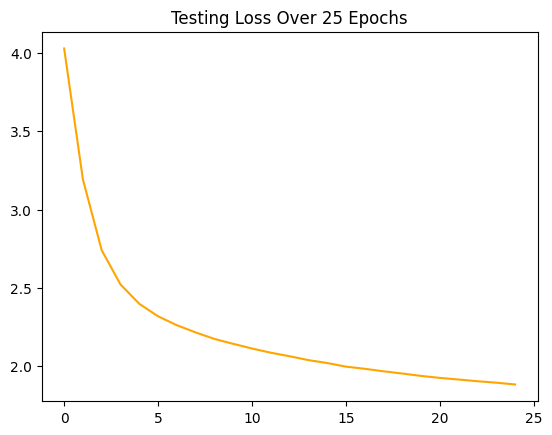

In [65]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

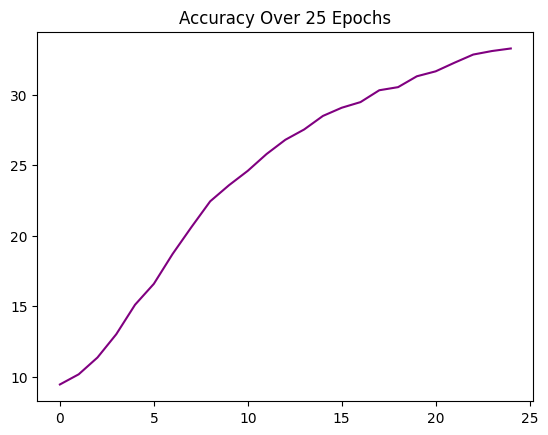

In [66]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### CIFAR10 Using LeNet Architecture

In [67]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

transform = transforms.Compose([transforms.Grayscale(num_output_channels = 1), transforms.ToTensor()])

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 128, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 1,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        nn.Flatten(),
        nn.Linear(576, 128),
        nn.Tanh(),
        nn.Linear(128, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-05)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 2.299
Validation loss: 2.292
Testing loss: 2.292
Accuracy:  12.680000305175781 

Epoch 2
Training loss: 2.283
Validation loss: 2.273
Testing loss: 2.272
Accuracy:  16.290000915527344 

Epoch 3
Training loss: 2.254
Validation loss: 2.231
Testing loss: 2.232
Accuracy:  20.389999389648438 

Epoch 4
Training loss: 2.208
Validation loss: 2.188
Testing loss: 2.188
Accuracy:  21.739999771118164 

Epoch 5
Training loss: 2.171
Validation loss: 2.163
Testing loss: 2.161
Accuracy:  22.729999542236328 

Epoch 6
Training loss: 2.149
Validation loss: 2.144
Testing loss: 2.144
Accuracy:  23.139999389648438 

Epoch 7
Training loss: 2.134
Validation loss: 2.131
Testing loss: 2.129
Accuracy:  23.59000015258789 

Epoch 8
Training loss: 2.121
Validation loss: 2.123
Testing loss: 2.119
Accuracy:  24.559999465942383 

Epoch 9
Training loss: 2.110
Validation loss: 2.114
Testing loss: 2.108
Accuracy:  25.4899997

### Training, Validation, Testing set loss & Accuracy over 25 Epochs using LeNet

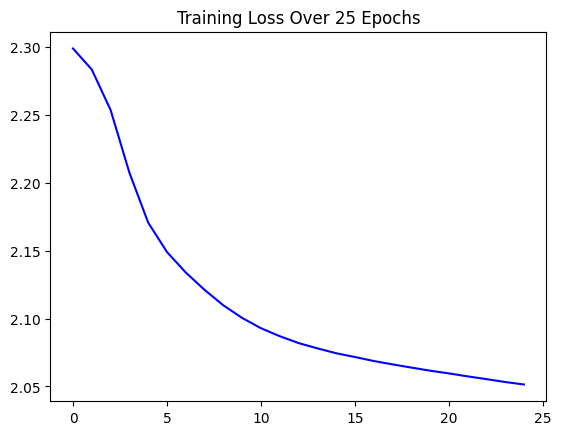

In [68]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

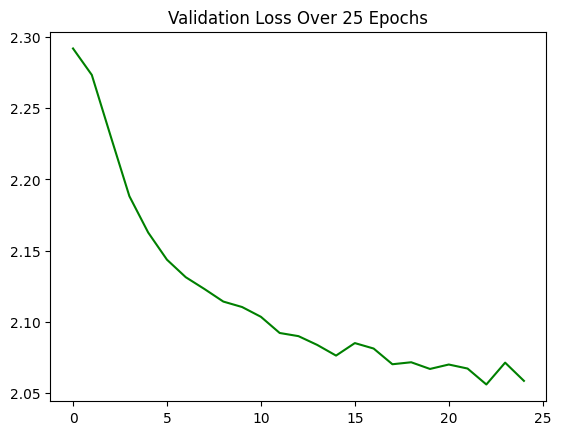

In [69]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

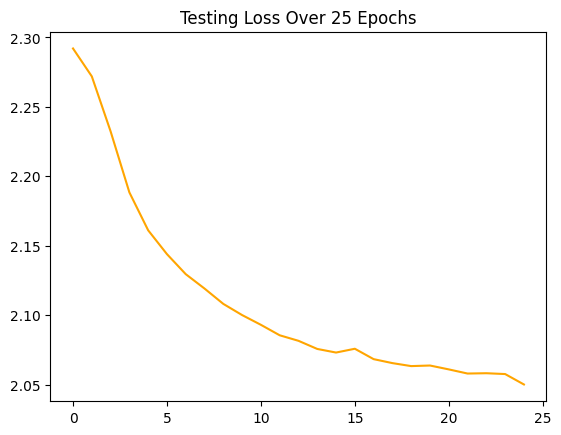

In [70]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

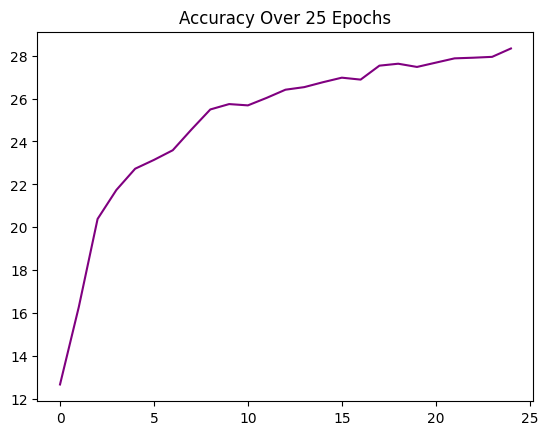

In [71]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### CIFAR10 Using all 3 input channels and changing learning rate

In [72]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 128, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 3,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),
        
        #another convolutional layer

        nn.Flatten(),
        nn.Linear(576, 128),
        nn.Tanh(),
        nn.Linear(128, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 1.868
Validation loss: 1.716
Testing loss: 1.703
Accuracy:  39.70000076293945 

Epoch 2
Training loss: 1.631
Validation loss: 1.535
Testing loss: 1.533
Accuracy:  45.619998931884766 

Epoch 3
Training loss: 1.488
Validation loss: 1.403
Testing loss: 1.430
Accuracy:  48.790000915527344 

Epoch 4
Training loss: 1.395
Validation loss: 1.349
Testing loss: 1.386
Accuracy:  50.45000076293945 

Epoch 5
Training loss: 1.325
Validation loss: 1.270
Testing loss: 1.338
Accuracy:  52.029998779296875 

Epoch 6
Training loss: 1.270
Validation loss: 1.204
Testing loss: 1.317
Accuracy:  53.380001068115234 

Epoch 7
Training loss: 1.221
Validation loss: 1.153
Testing loss: 1.304
Accuracy:  53.790000915527344 

Epoch 8
Training loss: 1.183
Validation loss: 1.138
Testing loss: 1.304
Accuracy:  53.88999938964844 

Epoch 9
Training loss: 1.148
Validation loss: 1.080
Testing loss: 1.287
Accuracy:  54.490001678

### Training, Validation, Testing set loss & Accuracy over 25 Epochs using LeNet & Changing input channels to 3 with increased learning rate

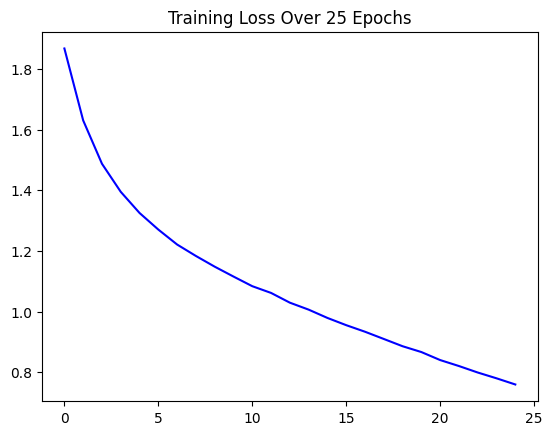

In [73]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

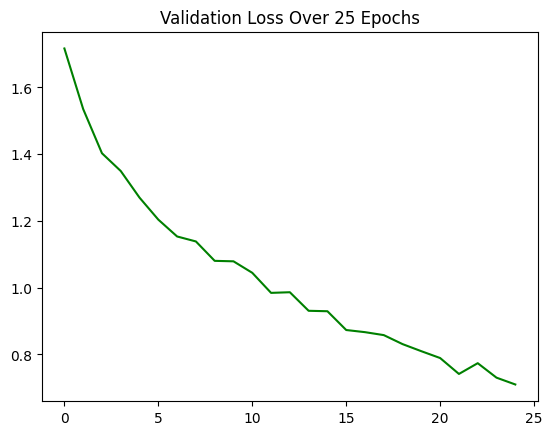

In [74]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

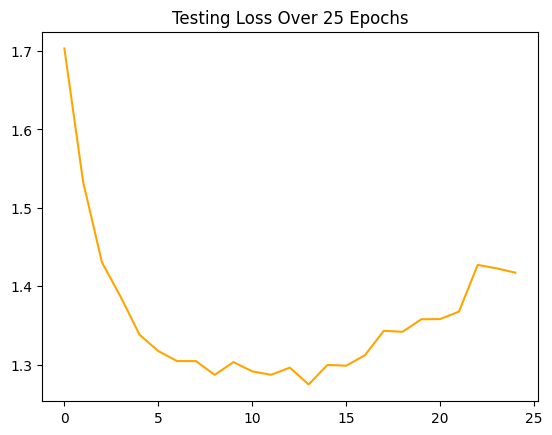

In [75]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

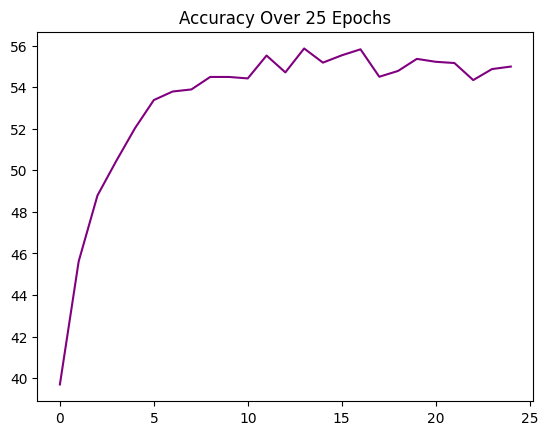

In [76]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### Reducing Batch Size to Try and Get Higher Accuracy

In [77]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 64, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 3,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),
        
        #another convolutional layer

        nn.Flatten(),
        nn.Linear(576, 128),
        nn.Tanh(),
        nn.Linear(128, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 1.815
Validation loss: 1.649
Testing loss: 1.641
Accuracy:  41.5 

Epoch 2
Training loss: 1.554
Validation loss: 1.509
Testing loss: 1.510
Accuracy:  45.790000915527344 

Epoch 3
Training loss: 1.421
Validation loss: 1.382
Testing loss: 1.412
Accuracy:  49.810001373291016 

Epoch 4
Training loss: 1.338
Validation loss: 1.292
Testing loss: 1.358
Accuracy:  51.77000045776367 

Epoch 5
Training loss: 1.273
Validation loss: 1.290
Testing loss: 1.382
Accuracy:  50.90999984741211 

Epoch 6
Training loss: 1.228
Validation loss: 1.163
Testing loss: 1.297
Accuracy:  54.400001525878906 

Epoch 7
Training loss: 1.180
Validation loss: 1.126
Testing loss: 1.297
Accuracy:  54.040000915527344 

Epoch 8
Training loss: 1.144
Validation loss: 1.086
Testing loss: 1.293
Accuracy:  54.599998474121094 

Epoch 9
Training loss: 1.109
Validation loss: 1.052
Testing loss: 1.284
Accuracy:  55.5099983215332 

Epoch 

### Further changes with batch size reduced from 128 -> 64

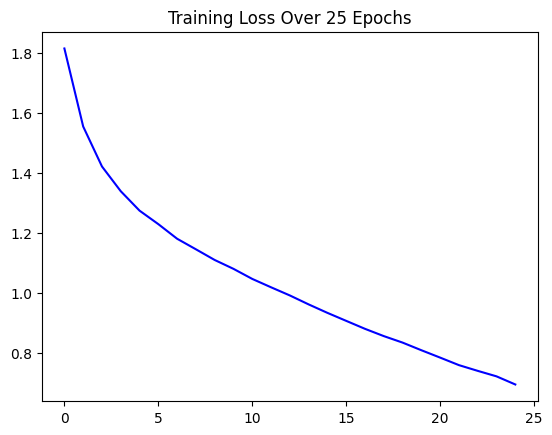

In [78]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

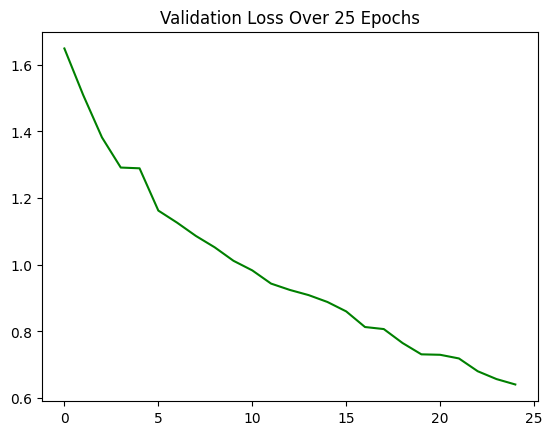

In [79]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

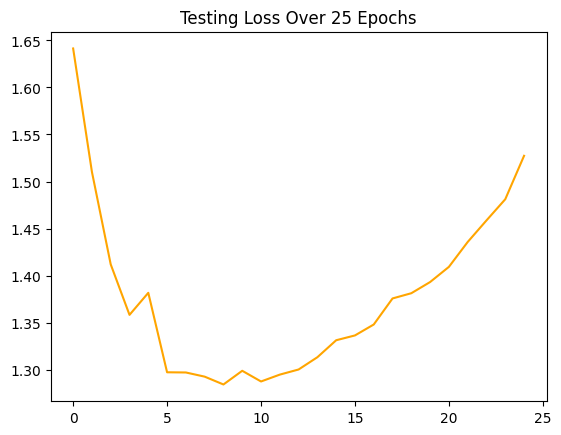

In [80]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

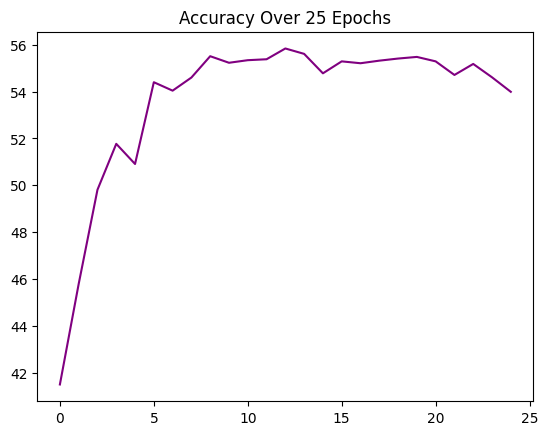

In [81]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### Trying ReLU() activations instead of Tanh()

In [82]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 64, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 3,out_channels = 6, kernel_size = 5, stride = 1, padding  = 2),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1, padding = 0),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),
        
        #another convolutional layer

        nn.Flatten(),
        nn.Linear(576, 128),
        nn.ReLU(),
        nn.Linear(128, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction

train_predict = model_predict(model, train_loader)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 1.787
Validation loss: 1.567
Testing loss: 1.537
Accuracy:  44.95000076293945 

Epoch 2
Training loss: 1.470
Validation loss: 1.410
Testing loss: 1.398
Accuracy:  49.65999984741211 

Epoch 3
Training loss: 1.370
Validation loss: 1.332
Testing loss: 1.350
Accuracy:  51.40999984741211 

Epoch 4
Training loss: 1.303
Validation loss: 1.301
Testing loss: 1.336
Accuracy:  52.7599983215332 

Epoch 5
Training loss: 1.249
Validation loss: 1.216
Testing loss: 1.271
Accuracy:  54.540000915527344 

Epoch 6
Training loss: 1.204
Validation loss: 1.155
Testing loss: 1.243
Accuracy:  56.13999938964844 

Epoch 7
Training loss: 1.165
Validation loss: 1.131
Testing loss: 1.235
Accuracy:  56.47999954223633 

Epoch 8
Training loss: 1.129
Validation loss: 1.108
Testing loss: 1.233
Accuracy:  56.59000015258789 

Epoch 9
Training loss: 1.098
Validation loss: 1.047
Testing loss: 1.190
Accuracy:  58.16999816894531

### Further changes using ReLU() activations instead of Tanh()

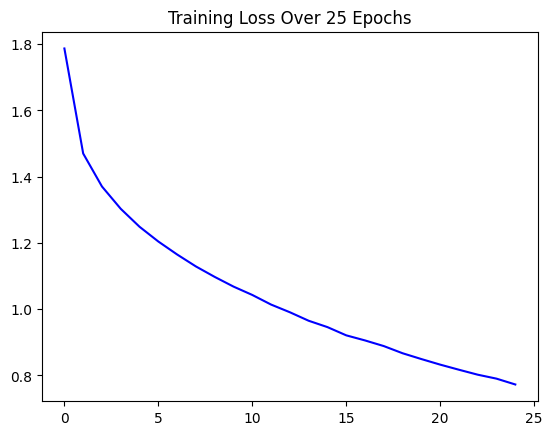

In [83]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

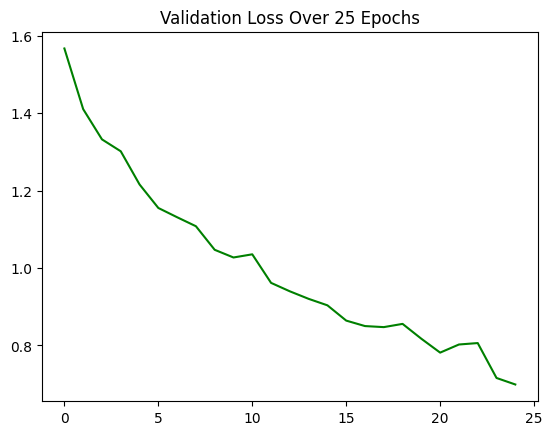

In [84]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

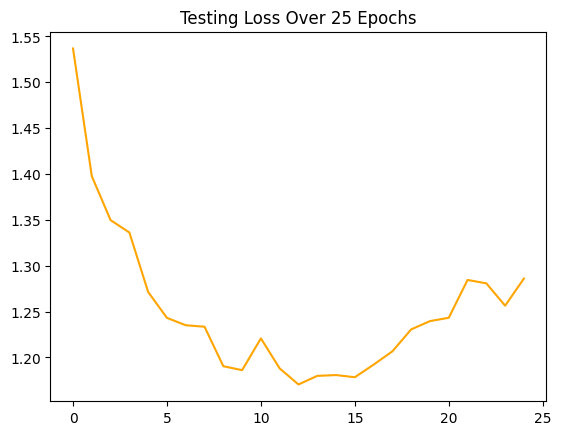

In [85]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

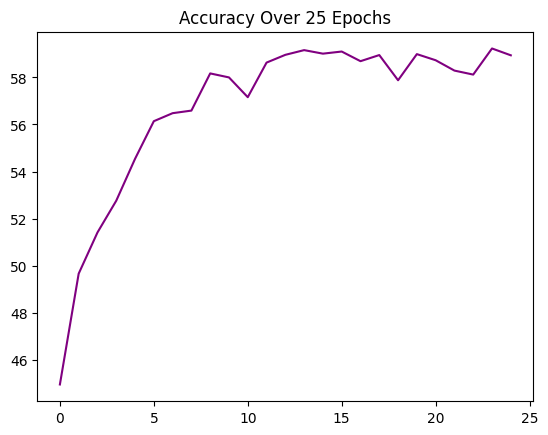

In [86]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()

### Modifying all input channels and output channels *3 due to 3 input channel at the start

In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#getting sets and converting to tensor so that can send it to a torch data loader
CIFAR10_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
CIFAR10_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

X_train, val = train_test_split(CIFAR10_trainset, test_size = 0.1, random_state=42)
val_set = val

train_loader = DataLoader(CIFAR10_trainset, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, shuffle = True, num_workers = 2)
test_loader = DataLoader(CIFAR10_testset, batch_size = 64, shuffle = True, num_workers = 2)

#training labels
#print(CIFAR10_trainset.targets)
#testing set labels
#print(CIFAR10_testset.targets)

#net class given in the homework page
def Net():
    model = nn.Sequential(
        #nn.Conv2d(in channels, out channels, kernel size, stride, padding)
        #our input has 1 channel as it is a grayscale image
        #need padding because our images are 28x28 while the LeNet takes in 32x32 inputs
        nn.Conv2d(in_channels = 3,out_channels = 6*3, kernel_size = 5, stride = 1, padding  = 2),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),

        #next convolutional layer
        #no longer needs padding since weve adjusted the input
        nn.Conv2d(in_channels = 6*3, out_channels = 16*3, kernel_size = 5, stride = 1, padding = 0),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 2, stride = 2),
        
        #another convolutional layer

        nn.Flatten(),
        nn.Linear(576*3, 128*3),
        nn.ReLU(),
        nn.Linear(128*3, 84*3),
        nn.ReLU(),
        nn.Linear(84*3, 10*3)
    )
    return model
    
def model_validate(model, data):
    running_total = 0
    num_correct = 0
    for i, (inputs, labels) in enumerate(data):
        inputs = inputs
        prediction = model(inputs)
        predictionVal, pred = torch.max(prediction, 1)
        running_total += prediction.size(0)
        num_correct += torch.sum(pred == labels)
    return num_correct*100/running_total
    
model = Net()
#same stuff from previous
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
running_loss = 0

#train the model for 25 epochs and show validation by printing in console
num_epochs = 25
trainLoss = []
valLoss = []
testLoss = []
accuracies = []
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    trainLoss.append(running_loss/len(train_loader))
    accuracy = float(model_validate(model, test_loader))
    accuracies.append(accuracy)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs,labels)
            val_loss+= loss.item()
        valLoss.append(val_loss/len(val_loader))
    
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = lossFunction(outputs, labels)
            test_loss += loss.item()
        testLoss.append(test_loss/len(test_loader))
    
    print(f"Epoch {epoch +1}\nTraining loss: {trainLoss[-1]:.3f}\nValidation loss: {valLoss[-1]:.3f}\nTesting loss: {testLoss[-1]:.3f}\nAccuracy: ", accuracy, "\n")
    
def model_predict(model, dataLoader):
    prediction = torch.tensor([])
    for batch in dataLoader:
        images, labels = batch
        pred = model(images)
        prediction = torch.cat((prediction, pred), dim = 0)
    return prediction


Files already downloaded and verified
Files already downloaded and verified
Epoch 1
Training loss: 1.689
Validation loss: 1.408
Testing loss: 1.409
Accuracy:  48.779998779296875 

Epoch 2
Training loss: 1.283
Validation loss: 1.192
Testing loss: 1.239
Accuracy:  55.599998474121094 

Epoch 3
Training loss: 1.121
Validation loss: 1.001
Testing loss: 1.099
Accuracy:  60.79999923706055 

Epoch 4
Training loss: 1.002
Validation loss: 0.898
Testing loss: 1.039
Accuracy:  63.599998474121094 

Epoch 5
Training loss: 0.896
Validation loss: 0.803
Testing loss: 0.988
Accuracy:  65.12999725341797 

Epoch 6
Training loss: 0.806
Validation loss: 0.722
Testing loss: 0.996
Accuracy:  65.75 

Epoch 7
Training loss: 0.722
Validation loss: 0.601
Testing loss: 0.933
Accuracy:  68.19999694824219 

Epoch 8
Training loss: 0.644
Validation loss: 0.521
Testing loss: 0.962
Accuracy:  67.91999816894531 

Epoch 9
Training loss: 0.568
Validation loss: 0.429
Testing loss: 0.948
Accuracy:  68.91999816894531 

Epoch 

### Displaying data of multiplying channels by 3

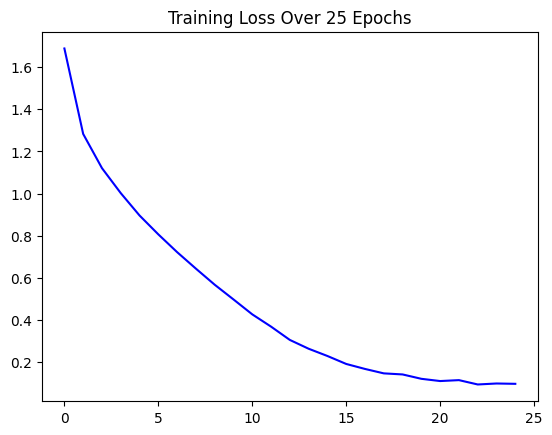

In [2]:
trainLoss = np.array(trainLoss)
valLoss = np.array(valLoss)
testLoss = np.array(testLoss)
accuracies = np.array(accuracies)

x = np.arange(num_epochs)
y = trainLoss

plt.title("Training Loss Over 25 Epochs")
plt.plot(x, y, color='blue')
plt.show()

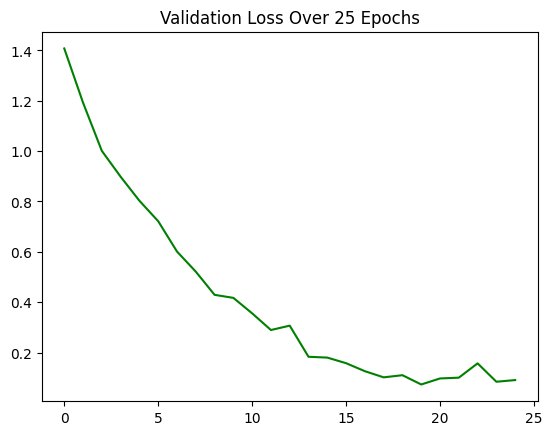

In [3]:
x = np.arange(num_epochs)
y = valLoss

plt.title("Validation Loss Over 25 Epochs")
plt.plot(x, y, color='green')
plt.show()

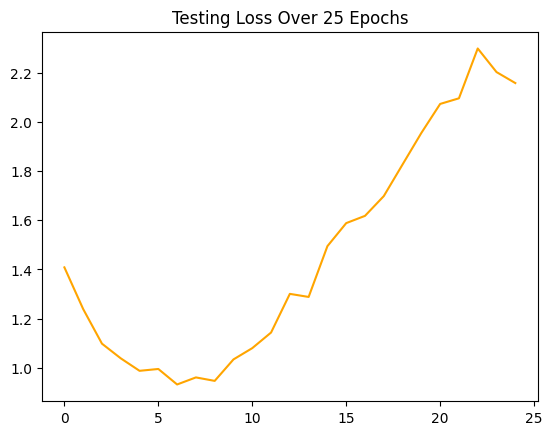

In [4]:
x = np.arange(num_epochs)
y = testLoss

plt.title("Testing Loss Over 25 Epochs")
plt.plot(x, y, color='orange')
plt.show()

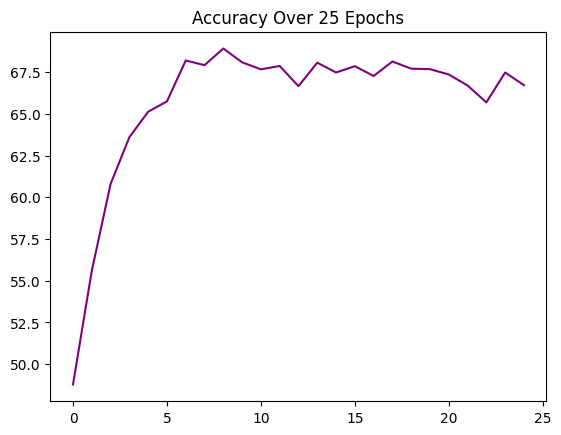

In [5]:
x = np.arange(num_epochs)
y = accuracies

plt.title("Accuracy Over 25 Epochs")
plt.plot(x, y, color='purple')
plt.show()